# [Qualitative Analysis]

Qualitative analyis over the datase

# Setup

## Library import
We import all the required Python libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os,sys
import joblib
from os import path

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


## Local library import
We import all the required local libraries libraries

In [4]:
# Include local library paths
import sys
# add project folders so local libraries can be imported
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))
sys.path.insert(1, os.path.join(os.getcwd()  , '../src'))

In [6]:
# notebook misc functions
# def pretty_print(df):
#     return display( HTML( df.to_html().replace("\\n","<br>") ) )

# def print_wrap(txt, width=120):
#     print('\n'.join(textwrap.wrap(txt, width=width)))


def displayAll(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):	
        display(df)  

def load_df(fpath, sep='\t', print_log=True, index_col=0, **kwargs):
    if not index_col is None:
        df = pd.read_csv(fpath, sep=sep, index_col=[index_col], **kwargs)
    else:
        df = pd.read_csv(fpath, sep=sep, **kwargs)
    if print_log:
        print(df.shape)
        print(df.columns)
        display(df.head())
    return df        

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [7]:
import json


# Data import
We retrieve all the required data for the analysis.

In [380]:
df_src = load_df("../out/paanx_preprocessed.tsv")
df_src.rename({"class": "collection_class"}, axis=1, inplace=True)
df_src

(1930, 4)
Index(['text', 'source', 'class', 'tokeep'], dtype='object')


,text,source,class,tokeep
0,i have been dealing with these for quite some ...,Quora,panic,1
1,"i was walking to school, but was running late ...",Quora,panic,1
2,"for me, panic attacks come two ways: randomly ...",Quora,panic,1
3,"i’m driving home, riding a tingly high from sa...",Quora,panic,1
4,it feels like your body turns into a black hol...,Quora,panic,1


,text,source,collection_class,tokeep
0,i have been dealing with these for quite some ...,Quora,panic,1
1,"i was walking to school, but was running late ...",Quora,panic,1
2,"for me, panic attacks come two ways: randomly ...",Quora,panic,1
3,"i’m driving home, riding a tingly high from sa...",Quora,panic,1
4,it feels like your body turns into a black hol...,Quora,panic,1
...,...,...,...,...
1925,i decided not to take the prescription medicat...,Reddit,anxiety,1
1926,speaking to your doctor will help but the most...,Reddit,anxiety,1
1927,lorazepam. i only take it as needed (sparingly...,Reddit,anxiety,1
1928,hi there. block your social media for a days a...,Reddit,anxiety,1


In [9]:
df = load_df("../out/post_analysis_final.tsv")
df.loc[df[df.gpt35_response.isna()].index, "gpt35_response"] = "{}" # deal with NAs
df = pd.DataFrame.from_records( df.gpt35_response.map(lambda v: json.loads(v)) )
df

(1930, 3)
Index(['idx', 'post', 'gpt35_response'], dtype='object')


,idx,post,gpt35_response
0,0,i have been dealing with these for quite some ...,"{""anxiety_or_panic"": ""none"", ""type_of_post"": ""..."
1,1,"i was walking to school, but was running late ...","{""anxiety_or_panic"": ""panic_attack"", ""type_of_..."
2,2,"for me, panic attacks come two ways: randomly ...","{""anxiety_or_panic"": ""panic_attack"", ""type_of_..."
3,3,"i’m driving home, riding a tingly high from sa...","{""anxiety_or_panic"": ""panic_attack"", ""type_of_..."
4,4,it feels like your body turns into a black hol...,"{""anxiety_or_panic"": ""panic_attack"", ""type_of_..."


,anxiety_or_panic,type_of_post,profesionally_diagnosed,profesionally_treated,taking_medication,other_medical_conditions,relationship_context,trigger,location,event_frequency,duration_time_scale,stressors,perceived_signs_of_distress,coping_mechanisms,social_environment,physical_symptoms,cognitive_symptoms,emotional_wellbeing,intensity,duration,negative_behavioral_changes,impact_on_daily_life
0,none,Personal_experience,N/A,N/A,N/A,[],Other,Other,Other,None,None,[],[],[],[],[],[],[],None,[],[],[]
1,panic_attack,Personal_experience,NO,NO,NO,[],Classmates,Bullying,School,Recurrent,Minutes,"[Being late for school, Locking of the locker ...","[Running late, Feeling trapped, Hyperventilati...","[Trying to tune out the bullying, Making a gam...","[Picking on me, Feeling alone]","[Hyperventilation, Tears, Knees buckling, Worl...","[Feeling trapped, Losing control, Feeling like...","[Feeling hurt, Feeling trapped, Feeling out of...",Strong,[Over an hour],"[Avoiding the locker room, Staying in the bath...","[Missed class, Feeling terrible]"
2,panic_attack,Personal_experience,N/A,N/A,N/A,[],Other,Other,Public_spaces,Recurrent,Minutes,"[Feeling threatened or unsafe, Worrying too much]","[Feeling out of breath, Dizziness, Tingling in...","[Calming breathing, Clearing the mind]",[],"[Increased heart rate, Chest tightness, Trembl...","[Worrying about dying, Irrational fears, Worry...","[Exhaustion, Confusion, Sleepiness]",Strong,"[Minutes, Seconds]",[Sleeping],[Feeling off for a few days after]
3,panic_attack,Personal_experience,NO,NO,NO,[],Romantic_partners,Darkness_and_deer,Driving,Recurrent,Minutes,"[Darkness, Deer]","[Rapid heartbeat, Difficulty breathing, Tight ...","[Pulling over, Calling mom, Talking to mom]",[],"[Rapid heartbeat, Difficulty breathing, Tight ...","[Fear of hitting a deer, Fear of dying, Fear o...","[Terror, Agony, Relief]",Strong,[10 minutes],[],"[Interrupted driving, Emotional distress]"
4,panic_attack,Personal_experience,NO,NO,NO,[],Other,Other,Other,Recurrent,Seconds,[],[],[],[],"[increased heart rate, sweating, trembling, di...","[losing consciousness, confusion, disorientation]","[anxiety, helplessness, fear]",Strong,[Seconds],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,none,Personal_experience,N/A,N/A,NO,[],N/A,N/A,N/A,None,None,[],[],"[taking gaba, l-theanine, and magnesium combin...",[],[],[],"[calm, able to handle things better]",None,[],[],[]
1926,none,Personal_experience,N/A,N/A,N/A,[],Other,Other,Other,None,None,[],[],"[cbt, exposure therapy, mindfulness practices]",[],[],[],[],None,[],[],[]
1927,none,Personal_experience,N/A,N/A,YES,[],Other,Other,Other,None,None,[],[],[],[],[],[],[],None,[],[],[]
1928,anxiety,Personal_experience,NO,NO,NO,[],Online_connections,None,Home,Recurrent,Days,[],[],[],[],[],[],[],None,[],[],[]


In [383]:
df = pd.concat( [df_src[["collection_class", "source"]], df ] , axis=1)
df.head()

,collection_class,source,anxiety_or_panic,type_of_post,profesionally_diagnosed,profesionally_treated,taking_medication,other_medical_conditions,relationship_context,trigger,location,event_frequency,duration_time_scale,stressors,perceived_signs_of_distress,coping_mechanisms,social_environment,physical_symptoms,cognitive_symptoms,emotional_wellbeing,intensity,duration,negative_behavioral_changes,impact_on_daily_life
0,panic,Quora,none,Personal_experience,N/A,N/A,N/A,[],Other,Other,Other,None,None,[],[],[],[],[],[],[],None,[],[],[]
1,panic,Quora,panic_attack,Personal_experience,NO,NO,NO,[],Classmates,Bullying,School,Recurrent,Minutes,"[Being late for school, Locking of the locker ...","[Running late, Feeling trapped, Hyperventilati...","[Trying to tune out the bullying, Making a gam...","[Picking on me, Feeling alone]","[Hyperventilation, Tears, Knees buckling, Worl...","[Feeling trapped, Losing control, Feeling like...","[Feeling hurt, Feeling trapped, Feeling out of...",Strong,[Over an hour],"[Avoiding the locker room, Staying in the bath...","[Missed class, Feeling terrible]"
2,panic,Quora,panic_attack,Personal_experience,N/A,N/A,N/A,[],Other,Other,Public_spaces,Recurrent,Minutes,"[Feeling threatened or unsafe, Worrying too much]","[Feeling out of breath, Dizziness, Tingling in...","[Calming breathing, Clearing the mind]",[],"[Increased heart rate, Chest tightness, Trembl...","[Worrying about dying, Irrational fears, Worry...","[Exhaustion, Confusion, Sleepiness]",Strong,"[Minutes, Seconds]",[Sleeping],[Feeling off for a few days after]
3,panic,Quora,panic_attack,Personal_experience,NO,NO,NO,[],Romantic_partners,Darkness_and_deer,Driving,Recurrent,Minutes,"[Darkness, Deer]","[Rapid heartbeat, Difficulty breathing, Tight ...","[Pulling over, Calling mom, Talking to mom]",[],"[Rapid heartbeat, Difficulty breathing, Tight ...","[Fear of hitting a deer, Fear of dying, Fear o...","[Terror, Agony, Relief]",Strong,[10 minutes],[],"[Interrupted driving, Emotional distress]"
4,panic,Quora,panic_attack,Personal_experience,NO,NO,NO,[],Other,Other,Other,Recurrent,Seconds,[],[],[],[],"[increased heart rate, sweating, trembling, di...","[losing consciousness, confusion, disorientation]","[anxiety, helplessness, fear]",Strong,[Seconds],[],[]


In [400]:
# Wrongly assigned classes
for k, g in df.groupby("collection_class"):
    print(f"\n\n---- {k} [{len(g)}] ---------")
    _df = g.anxiety_or_panic.value_counts().reset_index()
    _df["percentage"] = (_df.anxiety_or_panic/len(g))*100
    display(_df)




---- anxiety [1217] ---------


,index,anxiety_or_panic,percentage
0,anxiety,865,71.076417
1,none,298,24.486442
2,panic_attack,47,3.861956
3,both,1,0.082169




---- panic [713] ---------


,index,anxiety_or_panic,percentage
0,panic_attack,445,62.412342
1,none,208,29.172511
2,anxiety,60,8.415147


In [459]:
def analyze_bygroup(df, group_col, variable_col, filter_out=[]):    
    for k, g in df[(~df[variable_col].isnull() ) & (~df[variable_col].isin(filter_out))].groupby(group_col):
        print(f"\n\n---- {k} [{len(g)}] ---------")
        _df = g[variable_col].value_counts().reset_index()
        _df["percentage"] = (_df[variable_col]/len(g))*100
        displayAll(_df)

analyze_bygroup(df, group_col="collection_class", variable_col="intensity")



---- anxiety [1211] ---------


,index,intensity,percentage
0,None,662,54.665566
1,Moderate,326,26.919901
2,N/A,121,9.991742
3,Strong,92,7.597027
4,,4,0.330306
5,Mild,3,0.247729
6,Extreme,1,0.082576
7,Unknown,1,0.082576
8,Severe,1,0.082576




---- panic [713] ---------


,index,intensity,percentage
0,None,252,35.343619
1,Moderate,228,31.977560
2,Strong,149,20.897616
3,N/A,68,9.537167
4,Unknown,7,0.981767
5,Light,5,0.701262
6,,3,0.420757
7,Mild,1,0.140252


In [457]:
df[df['other_medical_conditions'].apply(lambda x: len(x) if isinstance(x, list) else 0) > 0]


,collection_class,source,anxiety_or_panic,type_of_post,profesionally_diagnosed,profesionally_treated,taking_medication,other_medical_conditions,relationship_context,trigger,location,event_frequency,duration_time_scale,stressors,perceived_signs_of_distress,coping_mechanisms,social_environment,physical_symptoms,cognitive_symptoms,emotional_wellbeing,intensity,duration,negative_behavioral_changes,impact_on_daily_life
17,panic,Quora,panic_attack,Personal_experience,NO,NO,NO,[sinus infection],Family,"Taking_new_medications, Large_crowds, Grocery_...",Home,Recurrent,Minutes,[None],"[Rapid heart beat, Dizziness, Upset stomach, H...","[Taking a walk, Taking a hot shower or bath, D...","[No friends nearby, Estranged from mother]","[Rapid heart beat, Dizziness, Upset stomach, H...",[Rapid scary thoughts about worst case scenario],"[Depressed, Zero energy]",Moderate,[Remainder of the day],[None],"[Limited support system, Difficulty finding ti..."
31,panic,Quora,panic_attack,Personal_experience,NO,NO,YES,[asthma],Family,Traumatic_experience,Hospital,Recurrent,Minutes,[Grieving],"[Crying, Discomfort, Tightness, Uncomfortable ...","[Conscious calming, Breathing techniques]",[],"[Shaking, Sweating]",[Feeling like could die],[Grieving],Moderate,[20 minutes],[],[Visiting the emergency room]
38,panic,Quora,panic_attack,Personal_experience,NO,NO,NO,[depression],Romantic_partners,Argument_or_conflict,Public_spaces,Recurrent,Minutes,"[terrible fights, blame me for all his problems]","[dizziness, chest tightness, difficulty breath...",[taking deep breaths],[],"[dizziness, chest tightness, difficulty breath...","[crying, sobbing, hyperventilating, feeling li...","[terrified, going through a really hard time]",Strong,[2 years],[],"[terrifying, felt like I was going to die]"
43,panic,Quora,panic_attack,Personal_experience,NO,NO,NO,[severe depression],Work,Negative_thoughts,Highway,First_time,Minutes,"[Severe depression, Negative thoughts]","[Heart skipping beats, Loss of control of brea...",[],[],[Dysfunctional breathing],[Ruminating about killing myself],"[Exhausted, Mentally drained]",Strong,"[5 minutes, 30 minutes]",[],[]
60,panic,Quora,panic_attack,Personal_experience,NO,N/A,N/A,[nerve issue],Other,Other,Other,First_time,Minutes,[],[],[],[],[felt like suffocating on own saliva],[fear and pain were overwhelming],[],Strong,[throughout the procedure],[],[experience could happen to anyone]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,anxiety,Reddit,anxiety,Personal_experience,YES,YES,YES,"[ibs-c, microscopic colitis]",N/A,N/A,N/A,None,None,[],[],[],[],[],[],[],N/A,[],[],[]
1895,anxiety,Reddit,anxiety,Personal_experience,NO,NO,NO,[sleep apnea],Work,Work-related,Work,Recurrent,Years,[],[],[],[],[physical symptoms],[],[],Moderate,[3rd day],[],[]
1902,anxiety,Reddit,anxiety,Personal_experience,YES,YES,NO,[mystery stomach pains],Public_spaces,Health_concern,Public_spaces,Recurrent,Years,[],[],[],[],[stomach pains],[],[],Moderate,[2 years],[],[]
1903,anxiety,Reddit,none,Personal_experience,N/A,N/A,N/A,"[PCOS, pineal cyst]",N/A,N/A,N/A,N/A,N/A,[],[],[],[],[],[],[],N/A,[],[],[]


In [461]:
analyze_bygroup(df[df['negative_behavioral_changes'].apply(lambda x: len(x) if isinstance(x, list) else 0) > 0]
                , group_col="collection_class", variable_col="negative_behavioral_changes", filter_out=["[]"])# "None", "N/A", "Other"])



---- anxiety [139] ---------


,index,negative_behavioral_changes,percentage
0,[avoidance of certain situations or activities],8,5.755396
1,[avoidance behaviors],5,3.597122
2,[Avoiding social situations],2,1.438849
3,[Avoidance of social situations],2,1.438849
4,"[avoiding certain situations, difficulty sleeping, difficulty relaxing]",1,0.719424
5,"[trouble sleeping, snap at people]",1,0.719424
6,[strong desire to avoid things that cause anxiety],1,0.719424
7,[avoid situations],1,0.719424
8,"[avoidance of certain situations or activities, difficulty sleeping, difficulty carrying out daily tasks]",1,0.719424
9,"[avoid crowded places, avoid parties and gatherings, prefer staying in bed]",1,0.719424




---- panic [75] ---------


,index,negative_behavioral_changes,percentage
0,[avoidance of certain situations or activities],2,2.666667
1,[None],2,2.666667
2,"[Avoiding the locker room, Staying in the bathroom]",1,1.333333
3,[Avoiding being alone during panic attacks],1,1.333333
4,[Broke down in front of dad],1,1.333333
5,[sometimes cried],1,1.333333
6,[Waking up in the middle of the night],1,1.333333
7,[avoidance of school],1,1.333333
8,"[Downgraded life to avoid intense interaction, Became agoraphobic and anthropophobic]",1,1.333333
9,[avoiding looking up],1,1.333333


In [10]:
df.columns

Index(['anxiety_or_panic', 'type_of_post', 'profesionally_diagnosed',
       'profesionally_treated', 'taking_medication',
       'other_medical_conditions', 'relationship_context', 'trigger',
       'location', 'event_frequency', 'duration_time_scale', 'stressors',
       'perceived_signs_of_distress', 'coping_mechanisms',
       'social_environment', 'physical_symptoms', 'cognitive_symptoms',
       'emotional_wellbeing', 'intensity', 'duration',
       'negative_behavioral_changes', 'impact_on_daily_life'],
      dtype='object')

In [24]:
for c in ['anxiety_or_panic', 'type_of_post', 'profesionally_diagnosed',
       'profesionally_treated', 'taking_medication',
       'other_medical_conditions', 'relationship_context', 'trigger',
       'location', 'event_frequency', 'duration_time_scale']:
    
    print(f"============= {c} ==================")

   #  displayAll(df[c].value_counts()[:10])
    print(df[c].value_counts())

============= anxiety_or_panic ==================
anxiety         925
none            506
panic_attack    492
both              1
Name: anxiety_or_panic, dtype: int64
============= type_of_post ==================
Personal_experience          1024
Giving_information            477
Tips_and_strategies           183
Support_and_encouragement     150
Other                          59
Question_and_discussion        17
Advocacy_and_awareness         14
Name: type_of_post, dtype: int64
============= profesionally_diagnosed ==================
N/A    1076
NO      765
YES      83
Name: profesionally_diagnosed, dtype: int64
============= profesionally_treated ==================
N/A    1083
NO      744
YES      97
Name: profesionally_treated, dtype: int64
============= taking_medication ==================
N/A    1055
NO      738
YES     131
Name: taking_medication, dtype: int64
============= other_medical_conditions ==================
[]                                     1859
[depression]       

In [15]:
cols ={
    'context': ['relationship_context', 'trigger', 'location'],
    'profesional_assistance': ['profesionally_diagnosed', 'profesionally_treated', 'taking_medication']
}

In [18]:
def dists(df):
    for k in cols:
        print(f"\n\t######## {k} ####### ")
        for c in cols[k]:
            print(f"\t\t======== {c} ======= ")
            print(f"\t\t{df[c].value_counts()[:10]}")

In [19]:
for k,g in df.groupby(by=["type_of_post"]):
    print(f"\n\n********* {k} **********")
    dists(g)



********* Advocacy_and_awareness **********

	######## context ####### 
		======== relationship_context ======= 
		Other         12
Classmates     1
N/A            1
Name: relationship_context, dtype: int64
		======== trigger ======= 
		Other           11
Social_event     1
None             1
N/A              1
Name: trigger, dtype: int64
		======== location ======= 
		Other     12
School     1
N/A        1
Name: location, dtype: int64

	######## profesional_assistance ####### 
		======== profesionally_diagnosed ======= 
		N/A    10
NO      3
YES     1
Name: profesionally_diagnosed, dtype: int64
		======== profesionally_treated ======= 
		N/A    11
NO      3
Name: profesionally_treated, dtype: int64
		======== taking_medication ======= 
		N/A    11
NO      3
Name: taking_medication, dtype: int64


********* Giving_information **********

	######## context ####### 
		======== relationship_context ======= 
		Other                 394
N/A                    64
None                   11


In [28]:
df.type_of_post.unique()

array(['Personal_experience', 'Giving_information', 'Tips_and_strategies',
       'Advocacy_and_awareness', 'Other', 'Support_and_encouragement',
       'Question_and_discussion', nan], dtype=object)

In [27]:
for c in cols["context"]:
    print(f"\n\n{c} = {len(df[c].unique()) }")
    print(f"\t{df[c].unique()}")



relationship_context = 21
	['Other' 'Classmates' 'Romantic_partners' 'Family' 'N/A' 'None' 'Friends'
 'College_students' 'Work' 'Public_spaces' 'Co-workers'
 'Argument_or_conflict' 'School' 'Roommates' 'Home' 'Therapist'
 'Neighbors' nan 'Unknown' 'Online_connections' 'Co-workers, Classmates']


trigger = 81
	['Other' 'Bullying' 'Darkness_and_deer' 'Life_transition'
 'Breakup_and_loss_of_a_loved_one' 'Unknown' 'Argument_or_conflict' 'None'
 'N/A'
 'Taking_new_medications, Large_crowds, Grocery_shopping, Being_alone'
 'Health_concern' 'Upcoming_tests' 'Losing_something'
 'Traumatic_experience' 'Accidental_overdose' 'Negative_thoughts'
 'Breakup' 'Social_event' 'Academic_stress'
 'Sun_in_the_car_and_couple_problems' 'Supersitions' 'Work'
 'Overstimulation' 'Work-related' 'Music' 'Sleep_paralysis'
 'Medical_appointment' 'Loud_noises' 'Marijuana_use' 'Substance_use'
 'Driving' 'Bugs' 'Sleeping' 'Exercise' 'Scary_movie' 'Rain' 'Eating'
 'Stress' 'Physical_exertion' 'Uncertainty' 'Multiple

In [220]:
dftmp = df[
    (df.anxiety_or_panic.isin(["panic_attack", "anxiety"])) 
    & (df.type_of_post.isin(['Personal_experience']))
    ][["anxiety_or_panic"] + cols["context"]].replace("N/A", "None").dropna(subset=cols["context"])

dftmp = dftmp[
    (~dftmp.trigger.isin(['Other', 'None']))
    & (~dftmp.location.isin(['Other', 'None'])) 
    ]
dftmp

,anxiety_or_panic,relationship_context,trigger,location
1,panic_attack,Classmates,Bullying,School
3,panic_attack,Romantic_partners,Darkness_and_deer,Driving
5,panic_attack,Family,Life_transition,Home
6,panic_attack,Other,Breakup_and_loss_of_a_loved_one,Home
7,panic_attack,Family,Unknown,Home
...,...,...,...,...
1872,anxiety,Online_connections,Social_event,Public_spaces
1895,anxiety,Work,Work-related,Work
1902,anxiety,Public_spaces,Health_concern,Public_spaces
1904,anxiety,School,Social_event,Home


In [221]:
# onlye 20 most frequent classes
dftmp = dftmp[(dftmp["trigger"].isin(dftmp["trigger"].value_counts()[:20].keys())) & (dftmp["location"].isin(dftmp["location"].value_counts()[:20].keys()))].copy()
dftmp

,anxiety_or_panic,relationship_context,trigger,location
5,panic_attack,Family,Life_transition,Home
7,panic_attack,Family,Unknown,Home
9,panic_attack,Other,Argument_or_conflict,Home
31,panic_attack,Family,Traumatic_experience,Hospital
32,panic_attack,Friends,Unknown,Unknown
...,...,...,...,...
1872,anxiety,Online_connections,Social_event,Public_spaces
1895,anxiety,Work,Work-related,Work
1902,anxiety,Public_spaces,Health_concern,Public_spaces
1904,anxiety,School,Social_event,Home


In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

[0 1 0 2]


In [222]:
label_encoders = {}
for c in dftmp.columns:
    if not c.startswith("encoded_"):
        label_encoders[c] = LabelEncoder()
        label_encoders[c].fit(dftmp[c].values)
        dftmp[f"encoded_{c}"] = label_encoders[c].transform(dftmp[c].values)

dftmp

,anxiety_or_panic,relationship_context,trigger,location,encoded_anxiety_or_panic,encoded_relationship_context,encoded_trigger,encoded_location
5,panic_attack,Family,Life_transition,Home,1,3,5,8
7,panic_attack,Family,Unknown,Home,1,3,15,8
9,panic_attack,Other,Argument_or_conflict,Home,1,8,0,8
31,panic_attack,Family,Traumatic_experience,Hospital,1,3,12,9
32,panic_attack,Friends,Unknown,Unknown,1,4,15,15
...,...,...,...,...,...,...,...,...
1872,anxiety,Online_connections,Social_event,Public_spaces,0,7,10,11
1895,anxiety,Work,Work-related,Work,0,14,18,17
1902,anxiety,Public_spaces,Health_concern,Public_spaces,0,9,4,11
1904,anxiety,School,Social_event,Home,0,11,10,8


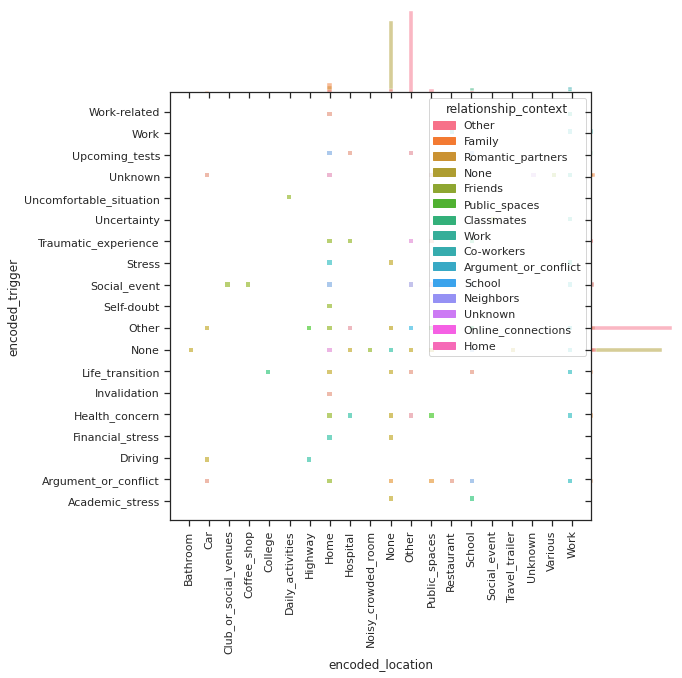

In [147]:
# plt.figure(figsize=(20,20))
sns.set_theme(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

x_axis = "location"
y_axis = "trigger"
g = sns.jointplot(data=dftmp, x=f"encoded_{x_axis}", y=f"encoded_{y_axis}", hue="relationship_context", height=8, kind="hist", space=0) # hist s=100,  marker="anxiety_or_panic"
# X
g.ax_joint.set_xticks( range(0, len(label_encoders[x_axis].classes_)))
g.ax_marg_x.xaxis.set_ticklabels((label_encoders[x_axis].classes_))#, visible = True)
g.ax_joint.tick_params(axis="x", rotation=90)
# Y
g.ax_joint.set_yticks( range(0, len(label_encoders[y_axis].classes_)))
g.ax_marg_y.yaxis.set_ticklabels((label_encoders[y_axis].classes_))#, visible = True)

plt.show()

/tmp/ipykernel_62584/1013410334.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


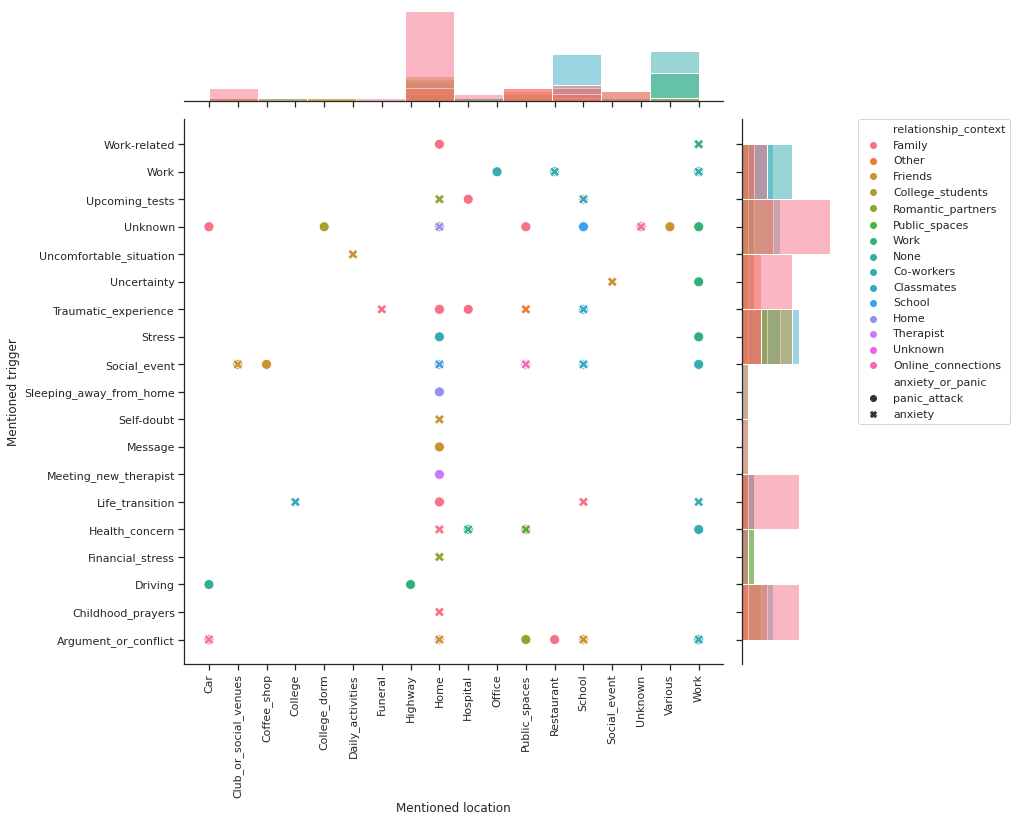

In [224]:
g = sns.jointplot(x=f"encoded_{x_axis}", y=f"encoded_{y_axis}", data=dftmp, 
                  kind="hist", height=10 , hue="relationship_context")
                #   xlim=(0, 60), ylim=(0, 12), ) #color='k') #kid=reg scatter=False
# g.fig.set_size_inches((10, 7))
g.ax_joint.cla()
sns.scatterplot(data=dftmp, x=f"encoded_{x_axis}", y=f"encoded_{y_axis}",
                ax=g.ax_joint, style="anxiety_or_panic", hue="relationship_context", s=100) # size='size' sizes=(10, 200)


# X
g.ax_joint.set_xticks( range(0, len(label_encoders[x_axis].classes_)))
g.ax_marg_x.xaxis.set_ticklabels((label_encoders[x_axis].classes_))#, visible = True)
g.ax_joint.tick_params(axis="x", rotation=90)
# plt.xlabel("Location")
g.ax_marg_x.xaxis.set_label("Location")
# Y
g.ax_joint.set_yticks( range(0, len(label_encoders[y_axis].classes_)))
g.ax_marg_y.yaxis.set_ticklabels((label_encoders[y_axis].classes_))#, visible = True)

g.set_axis_labels(xlabel='Mentioned location', ylabel='Mentioned trigger')
# sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.ax_joint.legend(bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

### table

In [226]:
cols_classes = ['anxiety_or_panic', 'type_of_post', 'profesionally_diagnosed',
       'profesionally_treated', 'taking_medication',
       'other_medical_conditions', 'relationship_context', 'trigger',
       'location', 'event_frequency']

In [232]:
dftmp = df[cols_classes]
dftmp

,anxiety_or_panic,type_of_post,profesionally_diagnosed,profesionally_treated,taking_medication,other_medical_conditions,relationship_context,trigger,location,event_frequency
0,none,Personal_experience,N/A,N/A,N/A,[],Other,Other,Other,None
1,panic_attack,Personal_experience,NO,NO,NO,[],Classmates,Bullying,School,Recurrent
2,panic_attack,Personal_experience,N/A,N/A,N/A,[],Other,Other,Public_spaces,Recurrent
3,panic_attack,Personal_experience,NO,NO,NO,[],Romantic_partners,Darkness_and_deer,Driving,Recurrent
4,panic_attack,Personal_experience,NO,NO,NO,[],Other,Other,Other,Recurrent
...,...,...,...,...,...,...,...,...,...,...
1925,none,Personal_experience,N/A,N/A,NO,[],N/A,N/A,N/A,None
1926,none,Personal_experience,N/A,N/A,N/A,[],Other,Other,Other,None
1927,none,Personal_experience,N/A,N/A,YES,[],Other,Other,Other,None
1928,anxiety,Personal_experience,NO,NO,NO,[],Online_connections,None,Home,Recurrent


In [356]:
df.event_frequency.value_counts()

None          1058
Recurrent      739
N/A             93
First_time      31
Few_times        2
Occasional       1
Name: event_frequency, dtype: int64

In [244]:
df.groupby(['type_of_post']).agg({'anxiety_or_panic': ['count']})

,anxiety_or_panic
,count
type_of_post,
Advocacy_and_awareness,14
Giving_information,477
Other,59
Personal_experience,1024
Question_and_discussion,17
Support_and_encouragement,150
Tips_and_strategies,183


In [408]:
# df.melt(id_vars=["anxiety_or_panic", "type_of_post"], value_vars=["profesionally_diagnosed", "profesionally_treated", "taking_medication"])

# dftmp = df[df["anxiety_or_panic"].isin(["anxiety", "panic_attack"])]
# dftmp = dftmp.melt(id_vars=["anxiety_or_panic", "type_of_post"], value_vars=["profesionally_diagnosed", "profesionally_treated", "taking_medication"])\
#     .groupby(by=["anxiety_or_panic", "type_of_post", "variable", "value"]).size().unstack(fill_value=0, level=[0,2])

dftmp = df
dftmp = dftmp.melt(id_vars=["collection_class", "type_of_post"], value_vars=["profesionally_diagnosed", "profesionally_treated", "taking_medication"])\
    .groupby(by=["collection_class", "type_of_post", "variable", "value"]).size().unstack(fill_value=0, level=[0,2])

display(dftmp)

print(dftmp.to_latex())

collection_class                                anxiety                        \
variable                        profesionally_diagnosed profesionally_treated   
type_of_post              value                                                 
Advocacy_and_awareness    N/A                         7                     8   
                          NO                          3                     3   
                          YES                         1                     0   
Giving_information        N/A                       307                   311   
                          NO                         59                    56   
                          YES                         5                     4   
Other                     N/A                        50                    50   
Personal_experience       N/A                       215                   215   
                          NO                        370                   360   
                          YES                        36                    46   
Question_and_discussion   N/A                        11                    11   
                          NO                          2                     2   
Support_and_encouragement N/A                        47                    47   
                          NO                         20                    20   
                          YES                         0                     0   
Tips_and_strategies       N/A                        63                    63   
                          NO                         15                    15   
                          YES                         0                     0   

collection_class                                                    panic  \
variable                        taking_medication profesionally_diagnosed   
type_of_post              value                                             
Advocacy_and_awareness    N/A                   8                       3   
                          NO                    3                       0   
                          YES                   0                       0   
Giving_information        N/A                 308                      93   
                          NO                   53                      12   
                          YES                  10                       1   
Other                     N/A                  50                       9   
Personal_experience       N/A                 209                     129   
                          NO                  371                     239   
                          YES                  41                      35   
Question_and_discussion   N/A                  11                       1   
                          NO                    2                       3   
Support_and_encouragement N/A                  49                      49   
                          NO                   18                      29   
                          YES                   0                       5   
Tips_and_strategies       N/A                  63                      92   
                          NO                   15                      13   
                          YES                   0                       0   

collection_class                                                         
variable                        profesionally_treated taking_medication  
type_of_post              value                                          
Advocacy_and_awareness    N/A                       3                 3  
                          NO                        0                 0  
                          YES                       0                 0  
Giving_information        N/A                      93                89  
                          NO                       12                12  
                          YES                       1                 5  
Other         

\begin{tabular}{llrrrrrr}
\toprule
                    & collection\_class & \multicolumn{3}{l}{anxiety} & \multicolumn{3}{l}{panic} \\
                    & variable & profesionally\_diagnosed & profesionally\_treated & taking\_medication & profesionally\_diagnosed & profesionally\_treated & taking\_medication \\
type\_of\_post & value &                         &                       &                   &                         &                       &                   \\
\midrule
Advocacy\_and\_awareness & N/A &                       7 &                     8 &                 8 &                       3 &                     3 &                 3 \\
                    & NO &                       3 &                     3 &                 3 &                       0 &                     0 &                 0 \\
                    & YES &                       1 &                     0 &                 0 &                       0 &                     0 &                 0 \

/tmp/ipykernel_62584/3239330793.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dftmp.to_latex())


In [411]:
df.type_of_post.value_counts().reset_index().sort_values("index")

,index,type_of_post
6,Advocacy_and_awareness,14
1,Giving_information,477
4,Other,59
0,Personal_experience,1024
5,Question_and_discussion,17
3,Support_and_encouragement,150
2,Tips_and_strategies,183


In [413]:
for k, g in df.groupby("collection_class"):
    print(f"\n\n--- {k} ---")
    print(g.source.value_counts())



--- anxiety ---
Quora     976
Reddit    241
Name: source, dtype: int64


--- panic ---
Quora     526
Reddit    187
Name: source, dtype: int64


In [375]:
dftmp.index.get_level_values(0)

Index(['Advocacy_and_awareness', 'Advocacy_and_awareness',
       'Giving_information', 'Giving_information', 'Giving_information',
       'Other', 'Personal_experience', 'Personal_experience',
       'Personal_experience', 'Question_and_discussion',
       'Question_and_discussion', 'Support_and_encouragement',
       'Support_and_encouragement', 'Support_and_encouragement',
       'Tips_and_strategies', 'Tips_and_strategies', 'Tips_and_strategies'],
      dtype='object', name='type_of_post')

In [312]:
pd.crosstab(df["type_of_post"], df["profesionally_diagnosed"])

profesionally_diagnosed,N/A,NO,YES
type_of_post,,,
Advocacy_and_awareness,10,3,1
Giving_information,400,71,6
Other,59,0,0
Personal_experience,344,609,71
Question_and_discussion,12,5,0
Support_and_encouragement,96,49,5
Tips_and_strategies,155,28,0


In [286]:
df.groupby(['type_of_post', 'profesionally_diagnosed', 'profesionally_treated']).agg({'profesionally_diagnosed': ['count'], 'profesionally_treated': ['count']})

profesionally_diagnosed  \
                                                                                          count   
type_of_post              profesionally_diagnosed profesionally_treated                           
Advocacy_and_awareness    N/A                     N/A                                        10   
                          NO                      NO                                          3   
                          YES                     N/A                                         1   
Giving_information        N/A                     N/A                                       400   
                          NO                      N/A                                         4   
                                                  NO                                         66   
                                                  YES                                         1   
                          YES                     NO                                          2   
                                                  YES                                         4   
Other                     N/A                     N/A                                        59   
Personal_experience       N/A                     N/A                                       342   
                                                  YES                                         2   
                          NO                      N/A                                         4   
                                                  NO                                        574   
                                                  YES                                        31   
                          YES                     NO                                         18   
                                                  YES                                        53   
Question_and_discussion   N/A                     N/A                                        12   
                          NO                      NO                                          5   
Support_and_encouragement N/A                     N/A                                        95   
                                                  NO                                          1   
                          NO                      NO                                         48   
                                                  YES                                         1   
                          YES                     NO                                          1   
                                                  YES                                         4   
Tips_and_strategies       N/A                     N/A                                       155   
                          NO                      N/A                                         1   
                                                  NO                                         26   
                                                  YES                                         1   

                                                                        profesionally_treated  
                                                                                        count  
type_of_post              profesionally_diagnosed profesionally_treated                        
Advocacy_and_awareness    N/A                     N/A                                      10  
                          NO                      NO                                        3  
                          YES                     N/A                                       1  
Giving_information        N/A                     N/A                                     400  
                          NO                      N/A                                       4  
                                                  NO                                       66  
                                       